##Importing Data and Overview

#**Objective**

The objective of this analysis was to explore various metrics related to brand perception and their influence on brand sentiment, specifically focusing on the love_hate1 variable. Several data analysis techniques, including data cleaning, clustering, regression, and visualization), were used to derive insights that can help businesses understand key factors affecting brand love/hate.

#**Key Findings**
##Strongest Drivers of Brand Love:

Trustworthiness, leader, and innovation were the strongest predictors of brand love. Brands that are perceived as trustworthy and that customers are more likely to recommend tend to enjoy stronger consumer affection.

##Weaker Drivers:

Metrics like fun and authenticity showed weaker correlations with brand sentiment, suggesting that these factors, while important, might not have as direct an impact on whether consumers love or hate a brand.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df_female = pd.read_csv("drive/My Drive/BAV_US_2020_9.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive/BAV_US_2020_9.csv'

What this does:
This command mounts your Google Drive to the Colab  environment.

Why it's needed:
Colab runs on remote servers and does not have access to local files on your computer. Mounting Drive makes files stored there accessible as if they were part of the local filesystem.

What didn’t work:
Using a local file path does not work in Colab since it doesn't have access to your computer’s file system.

In [ ]:
df_female.head()

,study,year,country,base,brand,category,sector,study_period,usage_preference_brand_base,brand_base,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,USA - Adults 2020 Full Year,2020,USA,Female,#Metoo,Charity & Non-Profit Organizations,Nonprofit,1.0,2187.87,881.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA - Adults 2020 Full Year,2020,USA,Female,#Metoo,Political Events & Organizations,Government,1.0,2187.87,881.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USA - Adults 2020 Full Year,2020,USA,Female,180°,Energizer Drinks,Beverages - Non Alcoholic,1.0,932.04,137.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA - Adults 2020 Full Year,2020,USA,Female,1stdibs,Internet Commerce - Buying & Selling,Internet,1.0,154.12,25.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA - Adults 2020 Full Year,2020,USA,Female,20:20,Television Shows: News/Information Programs,TV/Movie/Radio,1.0,1827.72,518.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#** Overview**
After loading the dataset BAV_US_2020_9.csv into the df_female DataFrame, the next step was to visually inspect the structure and contents of the data. This is done using the head() method to preview the first few rows and gain an immediate understanding of the dataset’s format, variable names, and potential data quality issues.

##Why it's important:
Before performing cleaning, filtering, or modeling, you need to confirm:

The dataset loaded correctly

The columns are named and structured as expected

There are no immediate red flags



In [ ]:
df_female.describe()

,year,study_period,usage_preference_brand_base,brand_base,unweighted_brand_base,differentiation_rank,relevance_rank,esteem_rank,knowledge_rank,brand_stature_rank,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
count,3874.0,3874.0,3623.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,3874.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2020.0,1.0,1542.560842,464.753955,456.601704,51.840274,50.893526,49.489244,48.476495,48.661655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,900.704392,303.020390,298.994496,29.256267,29.019702,29.237228,29.101247,29.227566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.0,1.0,140.460000,22.850000,20.000000,0.030000,0.030000,0.030000,0.030000,0.030000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.0,1.0,805.415000,265.835000,258.250000,26.487500,25.335000,23.682500,22.997500,22.372500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020.0,1.0,1280.090000,458.865000,452.000000,52.635000,52.075000,49.590000,47.790000,48.035000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2020.0,1.0,1918.410000,567.905000,561.000000,77.505000,76.227500,75.077500,73.712500,74.012500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2020.0,1.0,6769.620000,4848.760000,4751.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**What it does:**
describe() is a pandas method that returns a summary of statistics for numeric columns only, by default.

The output includes:

Count: Number of non-null values

Mean: Average value

Standard deviation (std): Measures spread

Min/Max: The range of the data


##Why it’s important:
Quickly Displays:

Distributions and central tendencies of variables

Outliers or unusual value ranges

Variables with no variance (which may need to be dropped)

Columns that may be scaled differently or require normalization

In [ ]:
df_female.dropna(axis=1, how='all', inplace=True)

# Strip whitespace and standardize column names
df_female.columns = df_female.columns.str.strip().str.lower().str.replace(" ", "_")

# Drop rows that are completely empty (if any)
df_female.dropna(axis=0, how='all', inplace=True)

# Drop exact duplicates if there are any
df_female.drop_duplicates(inplace=True)

important_columns = [
    'brand',
    'category',
    'sector',
    'brand_strength_rank',
    'brand_stature_rank',
    'differentiation_rank',
    'relevance_rank',
    'esteem_rank',
    'knowledge_rank',
    'trustworthy_pct',
    'innovative_pct',
    'leader_pct',
    'friendly_pct',
    'fun_pct',
    'authentic_pct',
    'high_quality_pct',
    'recommend_to_a_friend_pct',
    'total_prefer_pct',
    'love_hate1',  # general sentiment metric
    'brand_asset_rank'  # overall brand ranking
]

# Keep only the most important columns
df_female = df_female[important_columns]

# (Optional) Display a quick summary to confirm the clean-up
print(df_female.info())
print(df_female.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3874 entries, 0 to 3873
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      3874 non-null   object 
 1   category                   3874 non-null   object 
 2   sector                     3874 non-null   object 
 3   brand_strength_rank        3874 non-null   float64
 4   brand_stature_rank         3874 non-null   float64
 5   differentiation_rank       3874 non-null   float64
 6   relevance_rank             3874 non-null   float64
 7   esteem_rank                3874 non-null   float64
 8   knowledge_rank             3874 non-null   float64
 9   trustworthy_pct            3874 non-null   float64
 10  innovative_pct             3874 non-null   float64
 11  leader_pct                 3874 non-null   float64
 12  friendly_pct               3874 non-null   float64
 13  fun_pct                    3874 non-null   float

#**Clean and Standardize**

Removing irrelevant or broken data

Ensuring column names are uniform and accessible

Keeping only the most relevant brand performance metrics

This cleanup process is essential to ensure data integrity, ease of use, and performance efficiency in downstream analysis.



We also tried keeping all columns but that was	too noisy and inconsistent and had a risk of irrelevant or redundant variables. Manual renaming quickly became too time-consuming and .str.replace() is cleaner and scalable

In [ ]:
df_male = pd.read_csv("drive/My Drive/BAV_US_2020_11.csv")

In [ ]:
df_male.head()

,study,year,country,base,brand,category,sector,study_period,usage_preference_brand_base,brand_base,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,USA - Adults 2020 Full Year,2020,USA,Male,#Metoo,Charity & Non-Profit Organizations,Nonprofit,1.0,2069.82,879.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA - Adults 2020 Full Year,2020,USA,Male,#Metoo,Political Events & Organizations,Government,1.0,2069.82,879.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USA - Adults 2020 Full Year,2020,USA,Male,180°,Energizer Drinks,Beverages - Non Alcoholic,1.0,872.00,185.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA - Adults 2020 Full Year,2020,USA,Male,1stdibs,Internet Commerce - Buying & Selling,Internet,1.0,161.20,31.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA - Adults 2020 Full Year,2020,USA,Male,20:20,Television Shows: News/Information Programs,TV/Movie/Radio,1.0,1679.91,458.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_male.describe()

,year,study_period,usage_preference_brand_base,brand_base,unweighted_brand_base,differentiation_rank,relevance_rank,esteem_rank,knowledge_rank,brand_stature_rank,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
count,3877.0,3877.0,3626.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2020.0,1.0,1441.028439,454.544785,455.816611,52.622061,50.830970,49.200201,48.553064,48.533191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,841.716869,283.374463,289.983905,29.004984,28.850935,29.250308,29.256175,29.221012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.0,1.0,116.770000,21.490000,22.000000,0.050000,0.030000,0.030000,0.030000,0.030000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.0,1.0,748.010000,281.480000,274.000000,28.030000,25.930000,23.570000,23.160000,22.840000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020.0,1.0,1216.115000,441.310000,446.000000,53.810000,50.550000,48.890000,47.610000,48.120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2020.0,1.0,1809.060000,533.720000,544.000000,77.740000,76.610000,74.750000,73.860000,73.770000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2020.0,1.0,6364.480000,4818.580000,4871.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What it does:
describe() is a pandas method that returns a summary of statistics for numeric columns only, by default.

The output includes:

Count: Number of non-null values

Mean: Average value

Standard deviation (std): Measures spread

Min/Max: The range of the data

Why it’s important: Quickly surfaces:

Distributions and central tendencies of variables

Outliers or unusual value ranges

Variables with no variance (which may need to be dropped)

Columns that may be scaled differently or require normalization

In [ ]:
df_male.dropna(axis=1, how='all', inplace=True)

# Strip whitespace and standardize column names
df_male.columns = df_male.columns.str.strip().str.lower().str.replace(" ", "_")

# Drop rows that are completely empty (if any)
df_male.dropna(axis=0, how='all', inplace=True)

# Drop exact duplicates if there are any
df_male.drop_duplicates(inplace=True)

important_columns = [
    'brand',
    'category',
    'sector',
    'brand_strength_rank',
    'brand_stature_rank',
    'differentiation_rank',
    'relevance_rank',
    'esteem_rank',
    'knowledge_rank',
    'trustworthy_pct',
    'innovative_pct',
    'leader_pct',
    'friendly_pct',
    'fun_pct',
    'authentic_pct',
    'high_quality_pct',
    'recommend_to_a_friend_pct',
    'total_prefer_pct',
    'love_hate1',  # general sentiment metric
    'brand_asset_rank'  # overall brand ranking
]

# Keep only the most important columns
df_male = df_male[important_columns]


# (Optional) Display a quick summary to confirm the clean-up
print(df_male.info())
print(df_male.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      3877 non-null   object 
 1   category                   3877 non-null   object 
 2   sector                     3877 non-null   object 
 3   brand_strength_rank        3877 non-null   float64
 4   brand_stature_rank         3877 non-null   float64
 5   differentiation_rank       3877 non-null   float64
 6   relevance_rank             3877 non-null   float64
 7   esteem_rank                3877 non-null   float64
 8   knowledge_rank             3877 non-null   float64
 9   trustworthy_pct            3877 non-null   float64
 10  innovative_pct             3877 non-null   float64
 11  leader_pct                 3877 non-null   float64
 12  friendly_pct               3877 non-null   float64
 13  fun_pct                    3877 non-null   float

In [ ]:
# Combine the two DataFrames
combined_df = pd.concat([df_male, df_female], ignore_index=True)

# Clean column names (remove whitespace, make lowercase, replace spaces with underscores)
combined_df.columns = combined_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Drop columns that are completely empty
combined_df.dropna(axis=1, how='all', inplace=True)

# Drop duplicate rows if any
combined_df.drop_duplicates(inplace=True)

# Check for missing values
combined_df.isnull().sum()

#Fill missing values with median value
combined_df['recommend_to_a_friend_pct'] = combined_df['recommend_to_a_friend_pct'].fillna(combined_df['recommend_to_a_friend_pct'].median())
#combined_df['recommend_to_a_friend_pct'] = .fillna(combined_df.median())


#**Merge and Clean**
For the two gender-specific datasets (df_male and df_female) we merged to create a unified DataFrame for comparative analysis or modeling. This process ensures the data is standardized, complete, and ready for analysis.

In [ ]:

# Choose some brand personality traits (based on cleaned column names)
traits = ['trustworthy_pct', 'innovative_pct', 'fun_pct', 'relevance_rank', 'friendly_pct']

# Keep only the relevant columns (brand + selected traits)
columns_to_keep = ['brand'] + traits
df_traits = combined_df[columns_to_keep]

# Drop rows with missing trait values
df_traits = df_traits.dropna(subset=traits)

# Get brand name (can be replaced with user input if needed)
brand_name = input("Enter a brand name: ").strip()

# Filter the dataset for that brand
brand_row = df_traits[df_traits['brand'].str.lower() == brand_name.lower()]

# Show the results (All values are decimals respresenting percentages)
if not brand_row.empty:
    print(f"\nBrand Personality Profile for: {brand_name}")
    for trait in traits:
        print(f"{trait.replace('_pct', '').capitalize()}: {brand_row.iloc[0][trait]}")
else:
    print("Sorry, that brand wasn't found in the dataset.")

Enter a brand name: American Eagle

Brand Personality Profile for: American Eagle
Trustworthy: 15.35
Innovative: 6.39
Fun: 11.75
Relevance_rank: 24.27
Friendly: 14.32


The main goal here was to create a simple interactive tool that allows users to enter a brand name and instantly receive a profile of that brand’s key personality traits based on survey data. This enables quick analysis and comparison of brand perceptions from a consumer perspective.

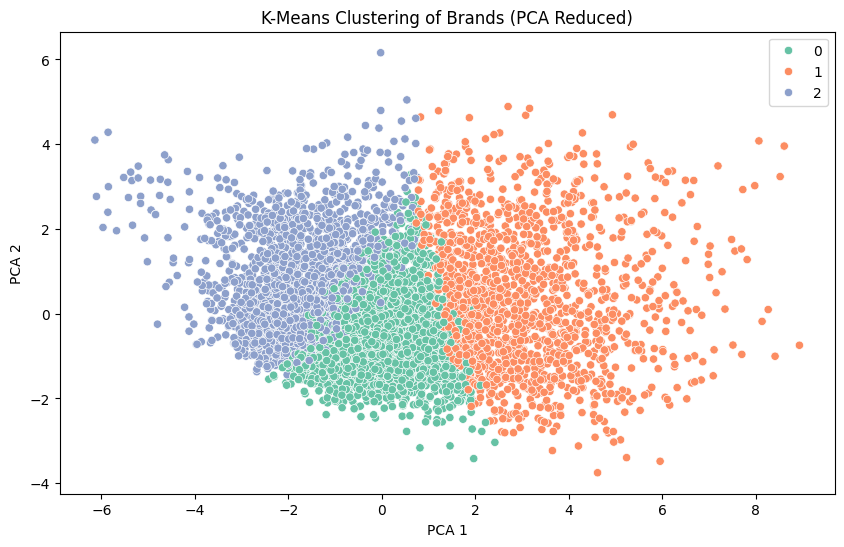

In [ ]:
# Select relevant numeric columns for clustering
features = [
    'trustworthy_pct', 'innovative_pct', 'leader_pct', 'friendly_pct',
    'fun_pct', 'authentic_pct', 'high_quality_pct',
    'recommend_to_a_friend_pct', 'total_prefer_pct', 'love_hate1'
]

# Filter the dataframe
X = combined_df[features].dropna()  # Drop rows with missing values in these columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

X['cluster'] = clusters
combined_df.loc[X.index, 'cluster'] = clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('K-Means Clustering of Brands (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

The goal of this analysis was to group brands into clusters based on consumer perception metrics traits to uncover latent patterns in how brands are positioned in the minds of consumers.

By using K-Means clustering and PCA visualization, we created a clear way to explore and understand how similar or different brands are from each other across key brand personality traits.


###Grouped brands into 3 personality clusters based on traits and preferences.

###Scaled data properly for machine learning

###Visualized complex data in a way that's easy to interpret.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Select predictor variables
features = [
    'trustworthy_pct', 'innovative_pct', 'leader_pct', 'friendly_pct',
    'fun_pct', 'authentic_pct', 'high_quality_pct',
    'recommend_to_a_friend_pct', 'total_prefer_pct'
]

# Drop rows with missing data
reg_df = combined_df[['love_hate1'] + features].dropna()

# Define X (predictors) and y (target)
X = reg_df[features]
y = reg_df['love_hate1']

# Add constant term for intercept
X_with_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_with_const).fit()

# View summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             love_hate1   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     342.1
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:12:33   Log-Likelihood:                -18650.
No. Observations:                7175   AIC:                         3.732e+04
Df Residuals:                    7165   BIC:                         3.739e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

This analysis uses linear regression to understand how specific brand perception traits influence overall brand sentiment, as measured by the love_hate1 score.

This allows us to:

Identify which traits most impact public sentiment.

Quantify the strength and direction of those effects.

<Figure size 1400x800 with 0 Axes>

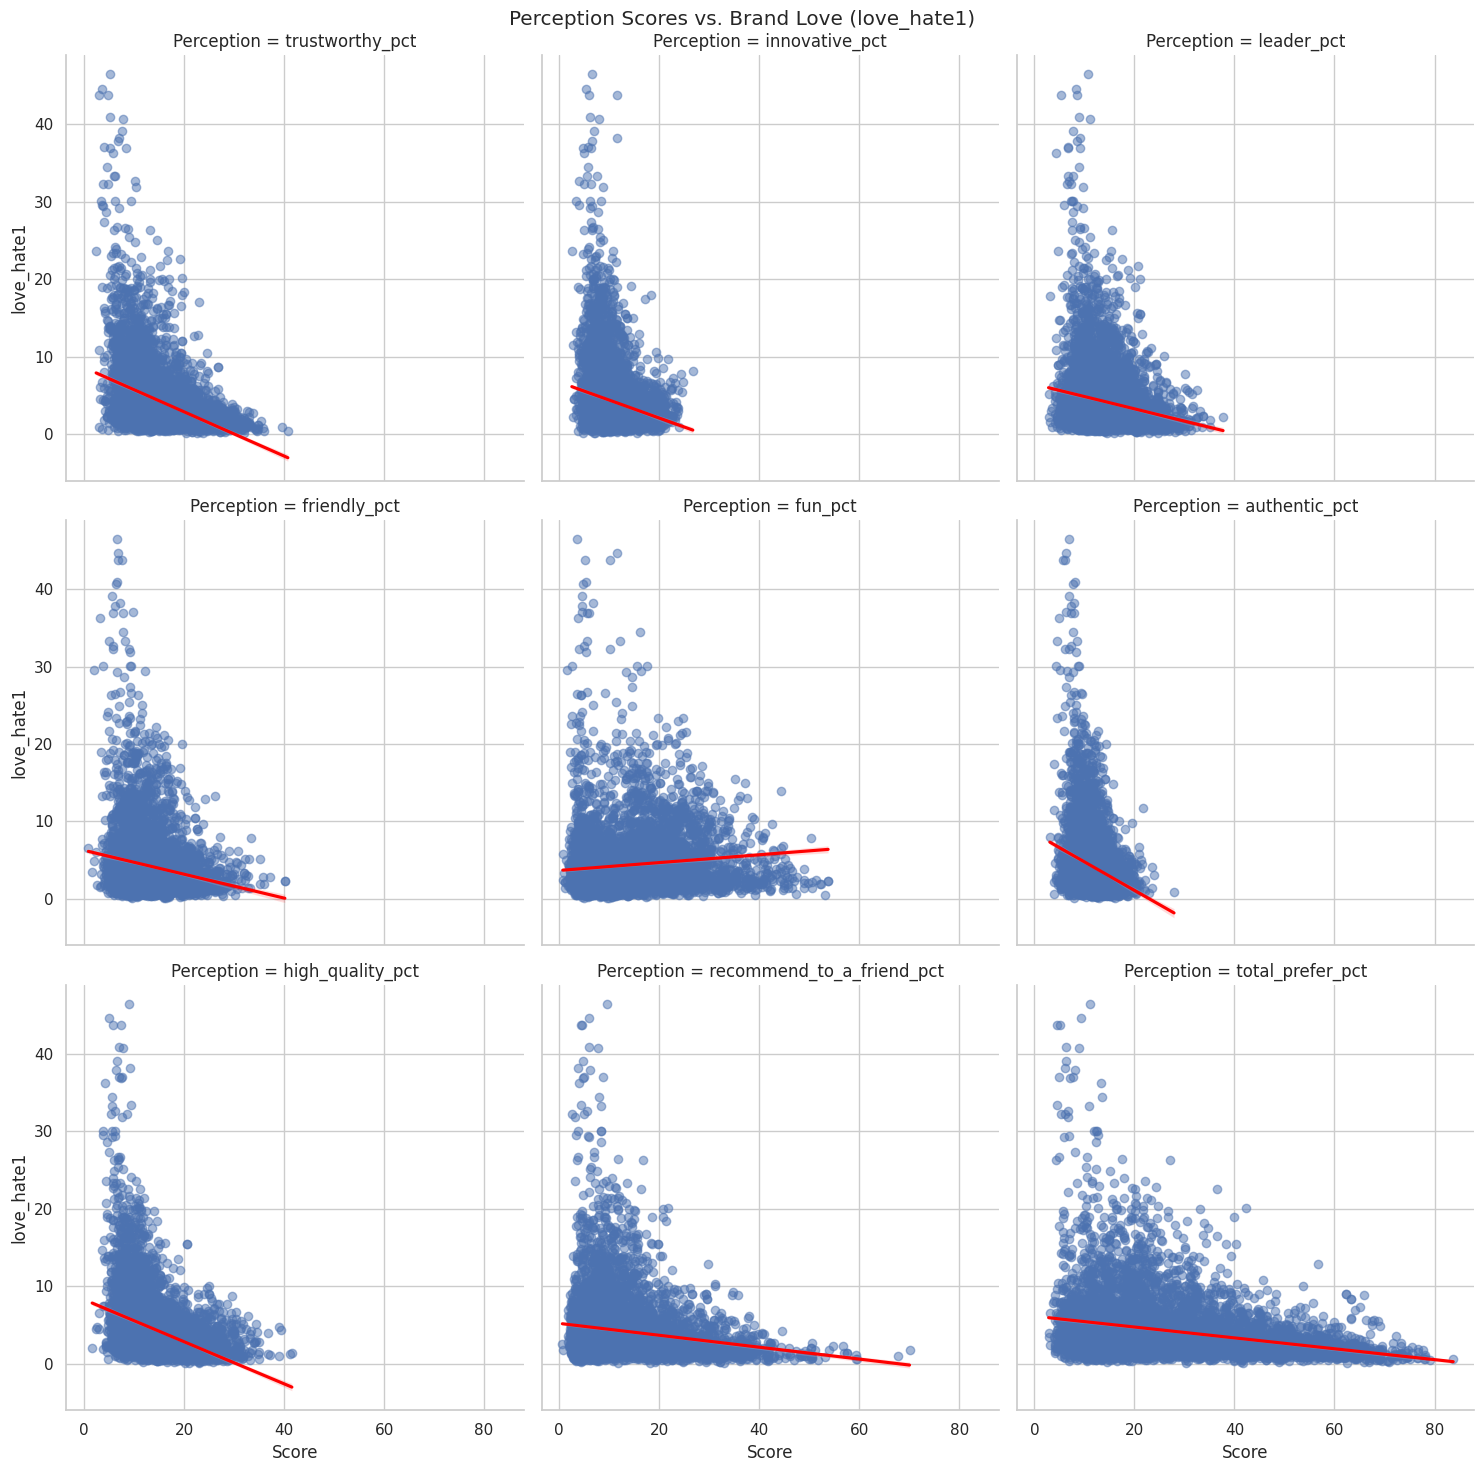

In [ ]:
#Scatter plots
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Melt the data to long format for faceted plotting
melted_df = combined_df[[
    'love_hate1', 'trustworthy_pct', 'innovative_pct', 'leader_pct',
    'friendly_pct', 'fun_pct', 'authentic_pct', 'high_quality_pct',
    'recommend_to_a_friend_pct', 'total_prefer_pct'
]].dropna()

# Plot scatterplots for each predictor vs love_hate1
melted = melted_df.melt(id_vars='love_hate1', var_name='Perception', value_name='Score')

plt.figure(figsize=(14, 8))
sns.lmplot(data=melted, x='Score', y='love_hate1', col='Perception', col_wrap=3,
           scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.subplots_adjust(top=0.95)
plt.suptitle("Perception Scores vs. Brand Love (love_hate1)")
plt.show()

This part of the analysis aims to explore the relationship between brand perception traits and overall brand sentiment (represented by love_hate1). The goal is to understand how various brand characteristics correlate with people's liking or disliking of a brand. Visualizing these relationships with scatter plots helps identify trends, outliers, and patterns.

Important Note: melted_df.melt() transforms the dataset into a long format, where each row contains one observation of love_hate1 and one perception trait.

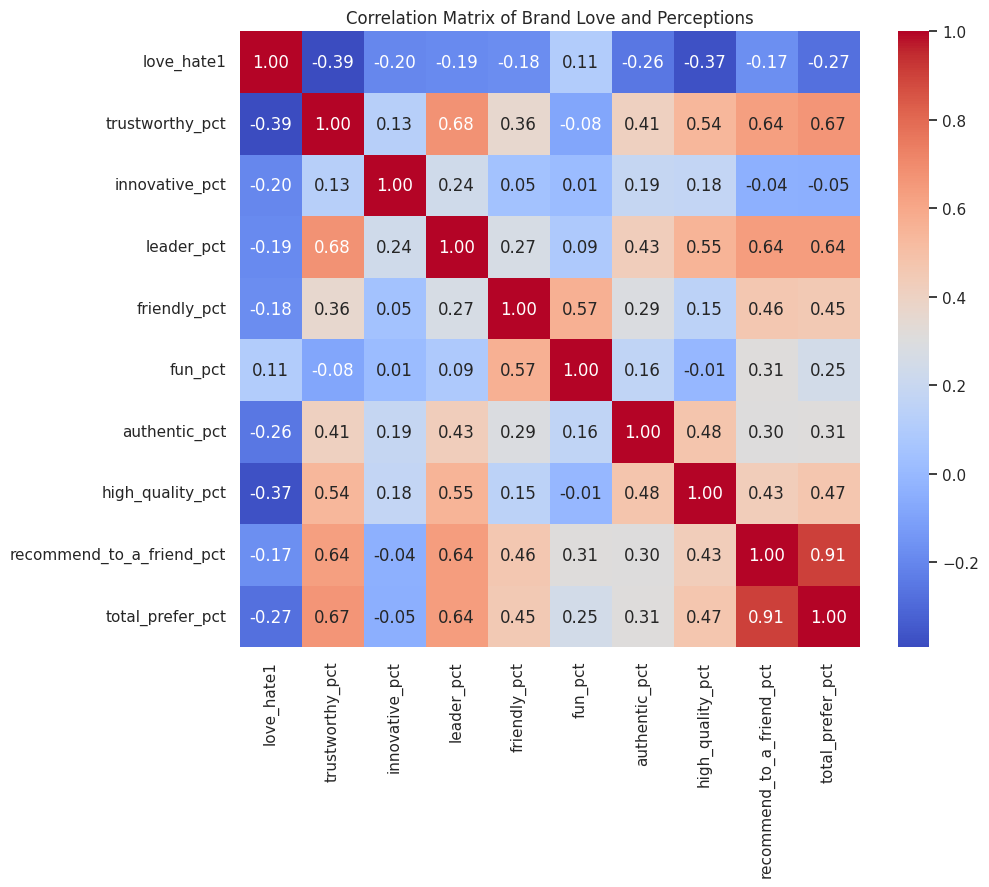

In [ ]:
#heatmap
# Select relevant columns
corr_df = combined_df[[
    'love_hate1', 'trustworthy_pct', 'innovative_pct', 'leader_pct',
    'friendly_pct', 'fun_pct', 'authentic_pct', 'high_quality_pct',
    'recommend_to_a_friend_pct', 'total_prefer_pct'
]].dropna()

# Compute correlation matrix
corr = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Brand Love and Perceptions")
plt.show()

The goal of this code is to create a heatmap that visualizes the correlation matrix between the brand sentiment (love_hate1) and several brand perception metrics. A heatmap will help in understanding the relationships between these variables by displaying correlation coefficients.

<ipython-input-60-0c07e1d5db24>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Perception', palette='viridis')


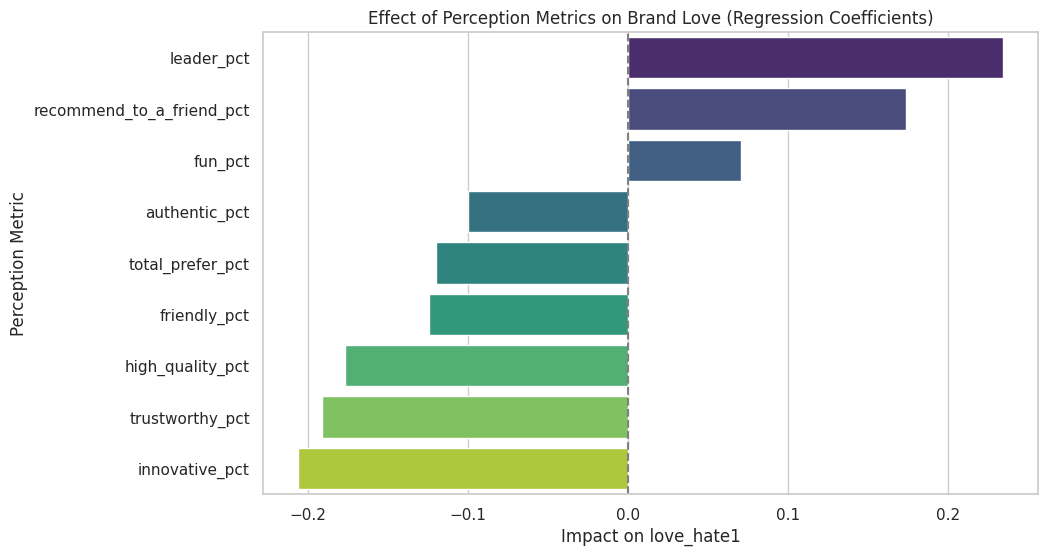

In [ ]:
# Bar Plot of Regression Coefficients
# Fit model using sklearn
from sklearn.linear_model import LinearRegression

X = corr_df.drop(columns='love_hate1')
y = corr_df['love_hate1']

lr = LinearRegression()
lr.fit(X, y)

# Create bar plot
coef_df = pd.DataFrame({'Perception': X.columns, 'Coefficient': lr.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Perception', palette='viridis')
plt.title("Effect of Perception Metrics on Brand Love (Regression Coefficients)")
plt.xlabel("Impact on love_hate1")
plt.ylabel("Perception Metric")
plt.axvline(0, color='gray', linestyle='--')
plt.show()

The goal here is to visualize the impact of various perception metrics on the overall brand sentiment (represented by love_hate1). This is achieved by using a linear regression model to quantify the relationship between these variables and brand love, then visualizing the regression coefficients as a bar plot to interpret which perception metrics most strongly influence sentiment.





#Findings
##**Business Implications & Recommendations**

###Focus on Building Trust:

Given the strong positive correlation between trustworthiness and brand love, brands looking to improve consumer sentiment should prioritize building trust through transparency, reliability, and consistent quality.

###Leverage Recommendations:

Brands that have high recommendation scores tend to have higher consumer sentiment. Encouraging word-of-mouth marketing or improving customer satisfaction could be effective strategies.

###Tailored Marketing Strategies:

By identifying clusters of similar brands, marketing campaigns can be tailored to target specific segments, making strategies more effective and personalized.

###Monitor Perception Shifts:

Brands should monitor shifts in perception traits such as innovation and high quality, as they are directly tied to changes in consumer sentiment.



#**Conclusion**

This analysis of brand perception metrics and their impact on brand sentiment provides insights that are paramount for learning the key drivers of brand love and hate. By focusing on trust, quality, and consumer recommendations, brands can develop more effective marketing strategies to foster positive relationships with consumers.


#**Works Cited**

OpenAI. ChatGPT. Version GPT-4, OpenAI, 2025, https://openai.com/chatgpt.